THIRD TASK> please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to
this Scikit-learn guide .
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might
need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences. 

1.Generate meaningful new data visualizations

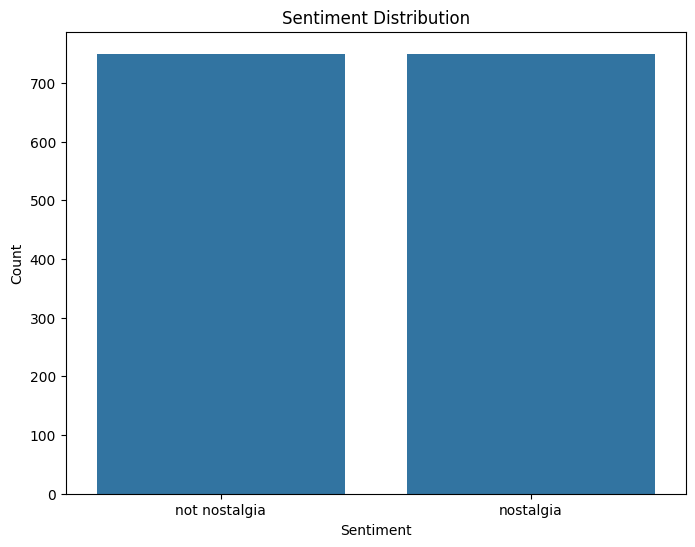

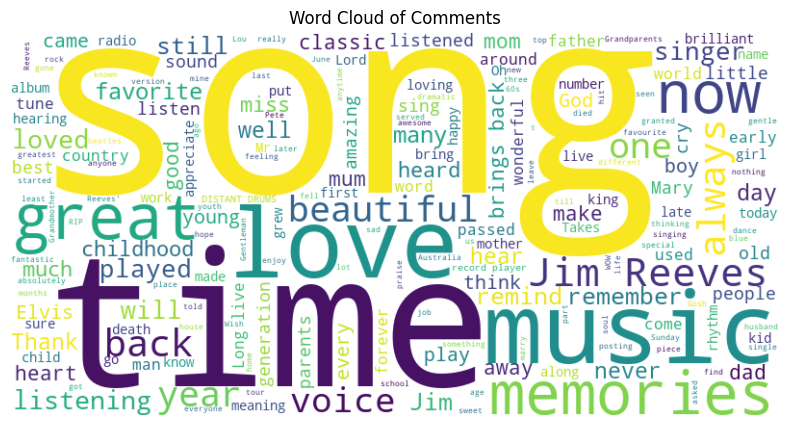

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from wordcloud import WordCloud

file_path = r'D:\Visual Studio Code\111\td\Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
df = pd.read_csv(file_path)

# 1. 情感分佈的橫條圖
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df) 
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. 前幾個評論的詞雲圖
# 選擇一定數量的評論來生成詞雲，這裡選擇前100個評論
comments = df['comment'][:100].astype(str).str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comments)

# 顯示詞雲圖
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示坐標軸
plt.title('Word Cloud of Comments')
plt.show()


圖1 Answer:

情感分佈圖展示了資料集中兩種情感標籤的數量分佈：
nostalgia（懷舊）：表示評論中帶有懷舊情感的數目。
not nostalgia（不懷舊）：表示評論中不帶有懷舊情感的數目。
圖中的縱軸（Count）表示評論的數量，橫軸（Sentiment）表示情感分類。從圖中可以看出，表達懷舊情感的評論數量等於不表達懷舊情感的評論。

圖2 Answer:

詞雲中的單詞取自資料集中的評論文本，通過分析這些評論，詞雲圖揭示了評論中出現頻率較高的單詞。例如，如果“Reeves”、“listen”、“love”、“nostalgia”等詞出現得較大，這表明這些詞彙在評論中被頻繁提及。詞雲圖可以幫助快速識別和理解評論中的主要話題和情感色彩。
從詞雲中可以看出，一些關鍵字如“gentle”、“heart”、“loving”、“generation”、“childhood”、“Jim Reeves”等，這些詞彙通常與懷舊情感相關聯，表明這些評論可能表達了對過去美好時光的回憶和懷念。
總的來說，這兩個圖表提供了資料集的直觀展示，橫條圖顯示了情感傾向的分佈，而詞雲圖則揭示了評論中的主要詞彙和話題。這些視覺化結果有助於進一步分析和理解資料集中的情感傾向和文本內容。


2.Generate TF-IDF features from the tags of each text.

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

file_path = r'D:\Visual Studio Code\111\td\Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
df = pd.read_csv(file_path)

# 創建TF-IDF模型的實例
vectorizer = TfidfVectorizer()

# 使用評論列生成TF-IDF特徵
tfidf_matrix = vectorizer.fit_transform(df['comment'])

# 查看TF-IDF特徵的文檔矩陣
print(tfidf_matrix.toarray())

# 獲取詞彙表中所有詞彙的名稱
feature_names = vectorizer.get_feature_names_out()

# 列印詞彙表中的詞彙
print(feature_names)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '000' '045' ... 'yup' 'zealand' 'zulus']


Answer:

從一組評論文本中提取了TF-IDF特徵，生成了一個稀疏的文檔-術語矩陣和一個詞彙表。這些特徵可以用於各種機器學習任務，如分類、聚類或主題建模。

1.	文檔-術語矩陣（Document-Term Matrix）：該輸出是一個矩陣，其中每一行代表個評論，每一列代表詞彙表中的一個詞彙。矩陣中的每個元素是對應詞彙在對應文檔中的TF-IDF值。這個值反映了該詞彙對於該文檔的重要性，一個較高的TF-IDF值表示這個詞彙在文檔中相對重要，並且/或者在文檔集合中不是非常常見。
2.	全零行向量：（[0.0, 0.0, 0.0, ..., 0.0]）表示在某些文檔中，詞彙表中的很多詞彙並沒有出現，因此它們的TF-IDF值為零。由於TF-IDF矩陣通常是稀疏的，大部分儲存格的值都是零，這是正常現象。這意味著在大部分文檔中，大量的詞彙並沒有出現。
3.	詞彙表（Vocabulary）：字串清單（如['00', '000', '045', ..., 'yup', 'zealand', 'culus']）是詞彙表，它包含了在所有文檔中出現過的所有唯一詞彙。這些詞彙將用於構建特徵空間，每個詞彙都對應於TF-IDF矩陣中的一列。
4.	稀疏性（Sparsity）：TF-IDF矩陣通常是稀疏的，表示大部分的TF-IDF值都是零。這表明在詞彙表中的很多詞彙在大部分文檔中並沒有出現。稀疏性是文本資料的一個常見特徵，因為不同文檔通常會使用不同的詞彙集。


3.Implement a simple Naive Bayes classifier to automatically categorize records.

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = r'D:\Visual Studio Code\111\td\Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
df = pd.read_csv(file_path)

X = df['comment']
y = df['sentiment']

# 創建TF-IDF模型的實例
vectorizer = TfidfVectorizer()

# 使用評論列生成TF-IDF特徵
tfidf_matrix = vectorizer.fit_transform(X)

# 將資料集拆分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# 創建樸素貝葉斯分類器的實例
classifier = MultinomialNB()

# 訓練分類器
classifier.fit(X_train, y_train)

# 對測試集進行預測
y_pred = classifier.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 使用分類器對整個資料集進行預測
y_full_pred = classifier.predict(tfidf_matrix)

# 將預測結果添加到原始資料框中
df['predicted_sentiment'] = y_full_pred

# 顯示帶有預測情感的資料框
print(df[['sentiment', 'predicted_sentiment']])


Accuracy: 0.83
          sentiment predicted_sentiment
0     not nostalgia       not nostalgia
1         nostalgia           nostalgia
2         nostalgia           nostalgia
3     not nostalgia       not nostalgia
4         nostalgia           nostalgia
...             ...                 ...
1495  not nostalgia       not nostalgia
1496  not nostalgia       not nostalgia
1497  not nostalgia       not nostalgia
1498      nostalgia       not nostalgia
1499      nostalgia           nostalgia

[1500 rows x 2 columns]


Answer:

輸出提供了一個關於樸素貝葉斯分類器在給定資料集上的性能快照，顯示了模型在測試資料集上的準確率以及部分預測結果。這些資訊可以用來評估模型的效果，並進一步對模型進行調整和優化。

1.	模型準確率：文本Accuracy: 0.83表示樸素貝葉斯分類器在測試資料集上的準確率為83%。這意味著分類器正確預測了83%的記錄的情感類別。
2.	預測結果：接下來的表格顯示了原始情感標籤 (`sentiment`) 和模型預測的情感標籤 (`predicted sentiment`) 的對比。表格列出了部分記錄，展示了模型的預測結果。從輸出中可以看出：模型對於某些記錄的預測是正確的，即實際情感標籤和預測情感標籤一致（如第0、1、2、3、4行）。也存在一些記錄，模型的預測可能與實際情感標籤不一致，但根據提供的輸出，無法確定具體哪些記錄的預測是錯誤的，因為只顯示了部分預測正確的記錄。


4.Use both TF-IDF features and term frequency features to build two independent classifiers.

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = r'D:\Visual Studio Code\111\td\Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv'
df = pd.read_csv(file_path)

# 假設CSV檔中有'sentiment'列作為標籤，'comment'列作為文本資料
X = df['comment']
y = df['sentiment']

# 將資料集拆分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建TF-IDF模型的實例
tfidf_vectorizer = TfidfVectorizer()
# 使用評論列生成TF-IDF特徵
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)

# 創建樸素貝葉斯分類器的實例
tfidf_classifier = MultinomialNB()
# training classifier
tfidf_classifier.fit(tfidf_matrix, y_train)

# 對測試集進行預測
tfidf_y_pred = tfidf_classifier.predict(tfidf_vectorizer.transform(X_test))

# 計算準確率
tfidf_accuracy = accuracy_score(y_test, tfidf_y_pred)
print(f'TF-IDF Classifier Accuracy: {tfidf_accuracy:.2f}')

# 創建詞頻模型的實例
count_vectorizer = CountVectorizer()
# 使用評論列生成詞頻特徵
count_matrix = count_vectorizer.fit_transform(X_train)

# 創建另一個樸素貝葉斯分類器的實例
count_classifier = MultinomialNB()
# 訓練分類器
count_classifier.fit(count_matrix, y_train)

# 對測試集進行預測
count_y_pred = count_classifier.predict(count_vectorizer.transform(X_test))

# 計算準確率
count_accuracy = accuracy_score(y_test, count_y_pred)
print(f'Word Frequency Classifier Accuracy: {count_accuracy:.2f}')


TF-IDF Classifier Accuracy: 0.83
Word Frequency Classifier Accuracy: 0.84


Answer:

最終，選擇哪種特徵表示取決於多個因素，包括資料集的特性、模型的性能以及特定應用場景的需求。在實踐中，通常需要嘗試不同的特徵表示和模型參數，以找到最適合特定任務的組合。

1.	TF-IDF 分類器準確率：輸出顯示使用TF-IDF特徵訓練的樸素貝葉斯分類器的準確率為83%。
2.	詞頻分類器準確率：輸出顯示使用詞頻特徵訓練的樸素貝葉斯分類器的準確率為84%。
3.	比較兩個分類器：詞頻分類器的準確率更高，表明詞頻特徵可能更能有效地捕捉文檔中詞彙的重要性，從而提高分類性能。
4.	不同之處：TF-IDF特徵通過逆文檔頻率（IDF）部分降低了在多數文檔中都出現的詞彙的權重，這有助於減少這些詞彙對分類結果的影響。詞頻特徵則簡單地計數每個詞彙在文檔中出現的次數，沒有進行任何調整，因此可能會受到高頻但信息量不大的詞彙的影響。
